In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as mpl
import matplotlib.dates as mdates


In [2]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 4,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
                     'axes.grid': False,
                     'axes.axisbelow': 'line',
                     'grid.alpha': 0.3,
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                    }
                   )


In [3]:
FOA_START_DATE = dt.fromisoformat('2019-11-19').date()
FOA_END_DATE = dt.fromisoformat('2022-04-30').date()
FUND_START_DATE = dt.fromisoformat('2022-05-01').date()
FUND_END_DATE = dt.fromisoformat('2023-02-28').date()

# Load Bitcoin Price Data (glassnode.com)

In [4]:
df = pd.read_csv('bitcoin-price-usd-20230301.csv')
df.timestamp = pd.to_datetime(df.timestamp)
df.rename(columns={'value': 'Bitcoin'}, inplace=True)
df['Date'] = df.timestamp.dt.date
df.index = df.timestamp.dt.date
df.dtypes

timestamp    datetime64[ns, UTC]
Bitcoin                  float64
Date                      object
dtype: object

# Load MVRV Price Data (glassnode.com)

In [5]:
tempdf = pd.read_csv('bitcoin-mvrv-z-score-20230301.csv')
tempdf.timestamp = pd.to_datetime(tempdf.timestamp)
tempdf.rename(columns={'value': 'MVRV Z-Score'}, inplace=True)
tempdf['Date'] = tempdf.timestamp.dt.date
tempdf.index = tempdf.timestamp.dt.date
tempdf.dtypes

timestamp       datetime64[ns, UTC]
MVRV Z-Score                float64
Date                         object
dtype: object

In [6]:
merged_df = pd.merge(df, tempdf, how='inner', on='Date')
merged_df

,timestamp_x,Bitcoin,Date,timestamp_y,MVRV Z-Score
0,2010-07-17 00:00:00+00:00,0.0495,2010-07-17,2010-07-17 00:00:00+00:00,-0.0000
1,2010-07-18 00:00:00+00:00,0.0858,2010-07-18,2010-07-18 00:00:00+00:00,2.5181
2,2010-07-19 00:00:00+00:00,0.0808,2010-07-19,2010-07-19 00:00:00+00:00,2.0970
3,2010-07-20 00:00:00+00:00,0.0747,2010-07-20,2010-07-20 00:00:00+00:00,1.6515
4,2010-07-21 00:00:00+00:00,0.0792,2010-07-21,2010-07-21 00:00:00+00:00,1.9270
...,...,...,...,...,...
4606,2023-02-25 00:00:00+00:00,"23,169.2731",2023-02-25,2023-02-25 00:00:00+00:00,0.2446
4607,2023-02-26 00:00:00+00:00,"23,540.4513",2023-02-26,2023-02-26 00:00:00+00:00,0.2718
4608,2023-02-27 00:00:00+00:00,"23,519.8640",2023-02-27,2023-02-27 00:00:00+00:00,0.2702
4609,2023-02-28 00:00:00+00:00,"23,159.3538",2023-02-28,2023-02-28 00:00:00+00:00,0.2445


In [7]:
df = merged_df[['Date', 'Bitcoin', 'MVRV Z-Score']]
df.index = df.Date
df

,Date,Bitcoin,MVRV Z-Score
Date,,,
2010-07-17,2010-07-17,0.0495,-0.0000
2010-07-18,2010-07-18,0.0858,2.5181
2010-07-19,2010-07-19,0.0808,2.0970
2010-07-20,2010-07-20,0.0747,1.6515
2010-07-21,2010-07-21,0.0792,1.9270
...,...,...,...
2023-02-25,2023-02-25,"23,169.2731",0.2446
2023-02-26,2023-02-26,"23,540.4513",0.2718
2023-02-27,2023-02-27,"23,519.8640",0.2702


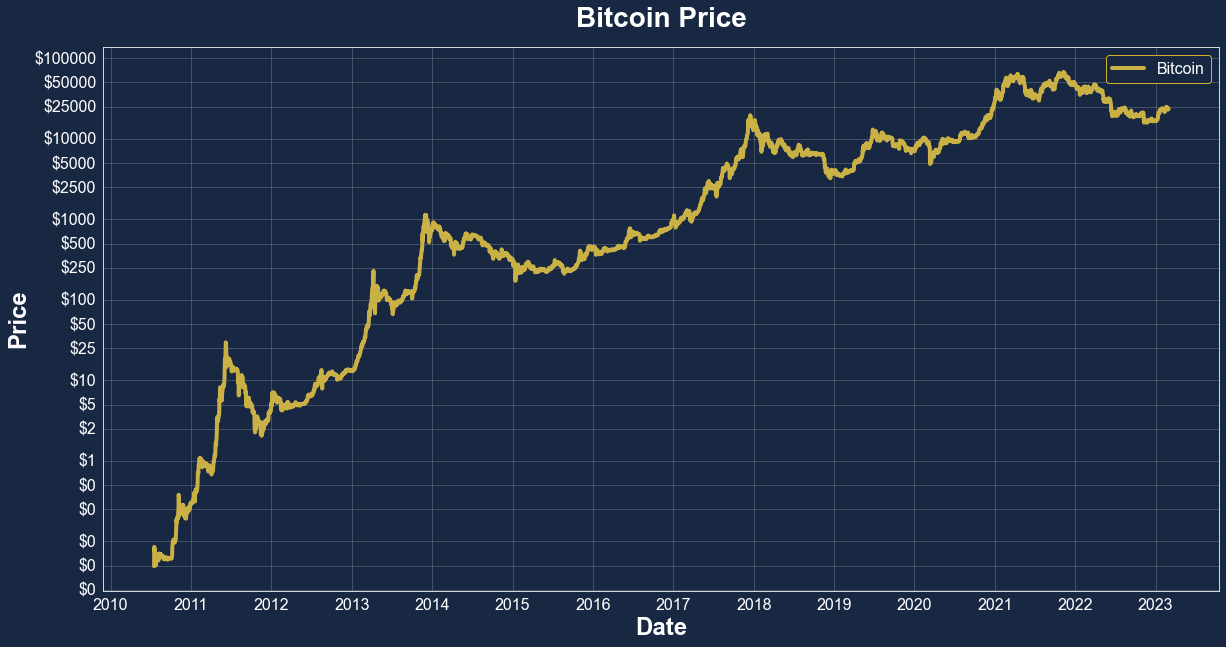

In [8]:
ax = df[['Bitcoin']].plot(figsize=(20, 10), title='Bitcoin Price', logy=True, color={'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)


ax.get_figure().savefig('bitcoin_price.pdf', format='pdf')


# 200 Week SMA Chart

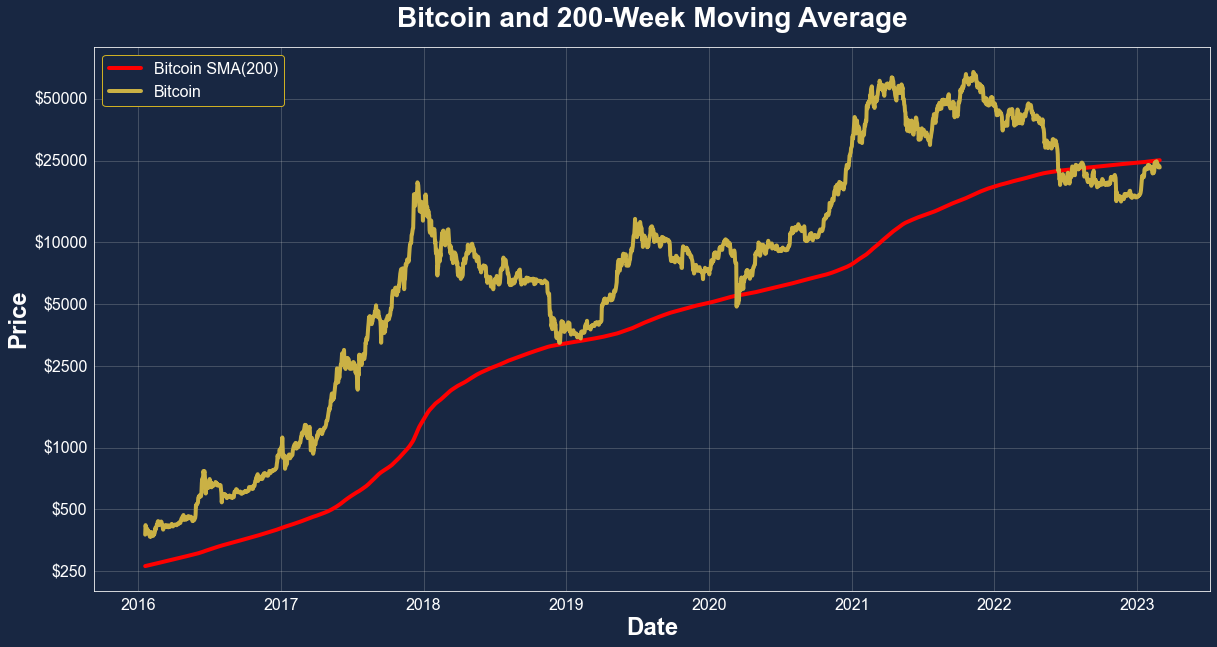

In [9]:
sample_start = FOA_START_DATE - timedelta(days=1400)
sample = df[sample_start:FUND_END_DATE].copy()
sample['Bitcoin SMA(200)'] = df[['Bitcoin']].rolling(1400).mean()
ax = sample[['Bitcoin SMA(200)', 'Bitcoin']].plot.line(figsize=(20, 10), title='Bitcoin and 200-Week Moving Average', logy=True, color={'Bitcoin SMA(200)': 'red', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True)

ax.get_figure().savefig('graph-btc-sma-200.pdf', format='pdf')
sample[['Bitcoin SMA(200)', 'Bitcoin']].to_csv('bitcoin-weeky-sma-200.csv')

# MVRV Z-Score Index

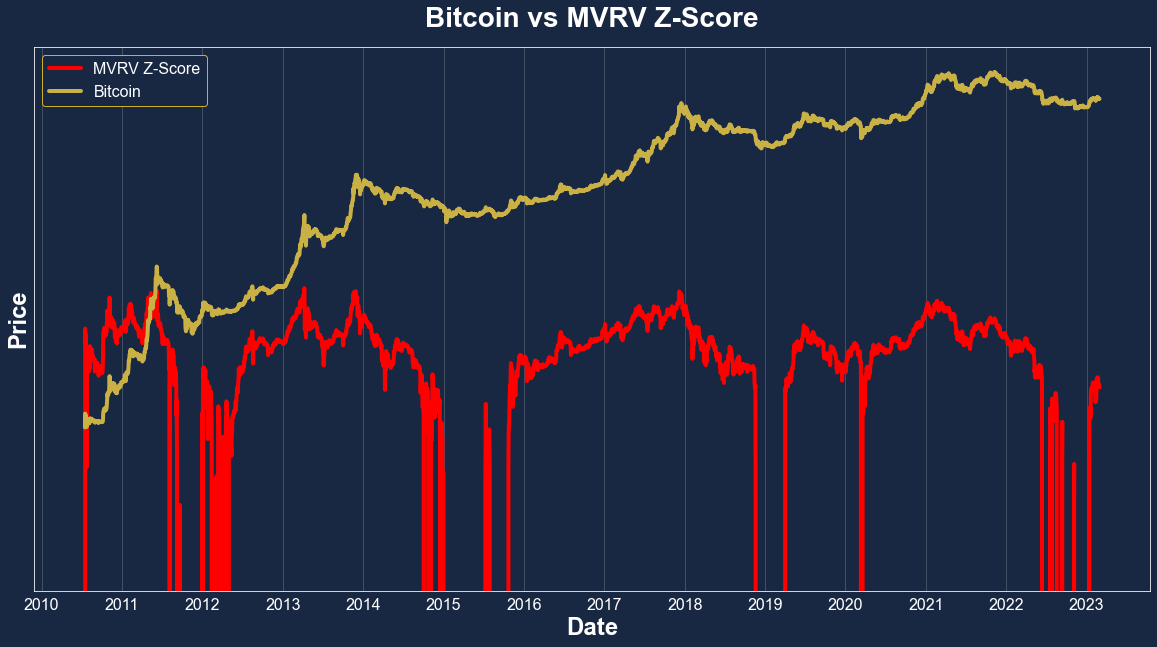

In [10]:
sample_start = FOA_START_DATE 
sample = df[:FUND_END_DATE].copy()
# sample['Bitcoin SMA(200)'] = df[['Bitcoin']].rolling(1400).mean()
ax = sample[['MVRV Z-Score', 'Bitcoin']].plot.line(figsize=(20, 10), title='Bitcoin vs MVRV Z-Score', logy=True, color={'MVRV Z-Score': 'red', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
# ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True)
ax.get_figure().savefig('graph-mvrv-z-score.pdf', format='pdf')
sample[['MVRV Z-Score', 'Bitcoin']].to_csv('mvrv-z-score.csv')

In [11]:
sample

,Date,Bitcoin,MVRV Z-Score
Date,,,
2010-07-17,2010-07-17,0.0495,-0.0000
2010-07-18,2010-07-18,0.0858,2.5181
2010-07-19,2010-07-19,0.0808,2.0970
2010-07-20,2010-07-20,0.0747,1.6515
2010-07-21,2010-07-21,0.0792,1.9270
...,...,...,...
2023-02-24,2023-02-24,"23,203.8254",0.2458
2023-02-25,2023-02-25,"23,169.2731",0.2446
2023-02-26,2023-02-26,"23,540.4513",0.2718
